In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns


%matplotlib inline

## load the data

In [82]:
INPUT_FILE = '../../data/tmp/demoClean.csv'


In [83]:
data = pd.read_csv(INPUT_FILE)

In [86]:
data.shape

(43185, 69)

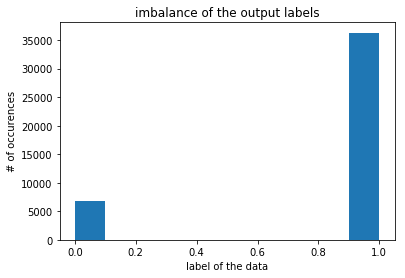

In [85]:
plt.hist(data.loan_status)
plt.title('imbalance of the output labels')
plt.xlabel('label of the data')
plt.ylabel('# of occurences')
plt.show()

## over and undersampling to get a balanced dataset

In [93]:
data_over = data[data['loan_status']==0].sample(15000, replace=True).reset_index()

In [94]:
data_under = data[data['loan_status']==1].sample(15000, replace=False).reset_index()

In [95]:
data_balanced = pd.concat([data_over, data_under], axis=0)

In [99]:
data_balanced = data_balanced.sample(frac=1)

In [ ]:
data_balanced.loan

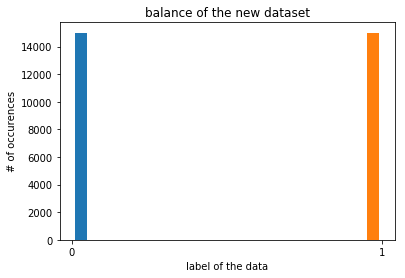

In [69]:
plt.hist(data_balanced.loan_status)
plt.title('balance of the new dataset')
plt.xlabel('label of the data')
plt.ylabel('# of occurences')
plt.show()

## split test train

In [71]:
train_data, test_data = train_test_split(data_balanced, test_size = 0.2)

In [72]:
X_train=train_data.drop('loan_status', axis=1)
X_test=test_data.drop('loan_status', axis=1)
y_train = train_data['loan_status']
y_test = test_data['loan_status']

In [80]:
data_balanced.shape

(15000, 140)

## fit model

In [73]:
model = LogisticRegression().fit(X_train, y_train)

ValueError: bad input shape (12000, 2)